# Performance of Random Swap Augmented Dataset on RNN

## Import Libraries

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

## Download and Prepare Rotten Tomatoes Dataset

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment Data set with 5%, 10%, 20% random

Augmented datapoints are concatenated into the original dataset to increase the size by 5%, 10% and 20% respectively.

In [3]:
# Augment by 5%, 10%, and 20%
augmented_synonym_5 = augment_data(original_train_data, 0.05, MODE.SYNONYM)
augmented_synonym_10 = augment_data(original_train_data,  0.10, MODE.SYNONYM)
augmented_synonym_20 = augment_data(original_train_data,  0.20, MODE.SYNONYM)
augmented_synonym_50 = augment_data(original_train_data,  0.50, MODE.SYNONYM)
augmented_synonym_100 = augment_data(original_train_data,  1.00, MODE.SYNONYM)

# Convert augmented data into Datasets
augmented_synonym_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_5],
    "label": [item["label"] for item in augmented_synonym_5]
}, features=features)

augmented_synonym_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_10],
    "label": [item["label"] for item in augmented_synonym_10]
}, features=features)

augmented_synonym_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_20],
    "label": [item["label"] for item in augmented_synonym_20]
}, features=features)

augmented_synonym_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_50],
    "label": [item["label"] for item in augmented_synonym_50]
}, features=features)

augmented_synonym_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_100],
    "label": [item["label"] for item in augmented_synonym_100]
}, features=features)

# Concatenate original and augmented datasets
augmented_synonym_train_data_5 = concatenate_datasets([original_train_data, augmented_synonym_5_dataset])
augmented_synonym_train_data_10 = concatenate_datasets([original_train_data, augmented_synonym_10_dataset])
augmented_synonym_train_data_20 = concatenate_datasets([original_train_data, augmented_synonym_20_dataset])
augmented_synonym_train_data_50 = concatenate_datasets([original_train_data, augmented_synonym_50_dataset])
augmented_synonym_train_data_100 = concatenate_datasets([original_train_data, augmented_synonym_100_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_synonym_train_data_5)}")
print(f"Train size after 10% augmentation: {len(augmented_synonym_train_data_10)}")
print(f"Train size after 20% augmentation: {len(augmented_synonym_train_data_20)}")
print(f"Train size after 50% augmentation: {len(augmented_synonym_train_data_50)}")
print(f"Train size after 100% augmentation: {len(augmented_synonym_train_data_100)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping a

## Using the Augmented Datasets on the Same RNN Text Classifier Pipeline

In [6]:
pipeline_synonym_5= TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_10 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_20 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_50 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_100 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8955 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1791 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9381 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7504 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8186 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12788 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10230 [00:00<?, ? examples/s]

Map:   0%|          | 0/2558 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13641 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Model Training

In [7]:
pipeline_synonym_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.68it/s]


Epoch: 1/10
Train Loss: 0.671, Train Acc: 0.601
Valid Loss: 0.645, Valid Acc: 0.635


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.53it/s]


Epoch: 2/10
Train Loss: 0.615, Train Acc: 0.691
Valid Loss: 0.580, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.43it/s]


Epoch: 3/10
Train Loss: 0.569, Train Acc: 0.741
Valid Loss: 0.571, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.35it/s]


Epoch: 4/10
Train Loss: 0.540, Train Acc: 0.770
Valid Loss: 0.556, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.79it/s]


Epoch: 5/10
Train Loss: 0.518, Train Acc: 0.795
Valid Loss: 0.548, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.82it/s]


Epoch: 6/10
Train Loss: 0.502, Train Acc: 0.813
Valid Loss: 0.557, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.68it/s]


Epoch: 7/10
Train Loss: 0.488, Train Acc: 0.828
Valid Loss: 0.550, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.33it/s]


Epoch: 8/10
Train Loss: 0.469, Train Acc: 0.848
Valid Loss: 0.545, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.67it/s]


Epoch: 9/10
Train Loss: 0.461, Train Acc: 0.853
Valid Loss: 0.544, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]

Epoch: 10/10
Train Loss: 0.444, Train Acc: 0.873
Valid Loss: 0.546, Valid Acc: 0.754


In [8]:
pipeline_synonym_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.14it/s]


Epoch: 1/10
Train Loss: 0.677, Train Acc: 0.583
Valid Loss: 0.637, Valid Acc: 0.660


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]


Epoch: 2/10
Train Loss: 0.597, Train Acc: 0.711
Valid Loss: 0.588, Valid Acc: 0.712


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.25it/s]


Epoch: 3/10
Train Loss: 0.555, Train Acc: 0.755
Valid Loss: 0.571, Valid Acc: 0.722


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.12it/s]


Epoch: 4/10
Train Loss: 0.531, Train Acc: 0.780
Valid Loss: 0.565, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.45it/s]


Epoch: 5/10
Train Loss: 0.510, Train Acc: 0.803
Valid Loss: 0.563, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.50it/s]


Epoch: 6/10
Train Loss: 0.490, Train Acc: 0.827
Valid Loss: 0.558, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]


Epoch: 7/10
Train Loss: 0.474, Train Acc: 0.840
Valid Loss: 0.557, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.38it/s]


Epoch: 8/10
Train Loss: 0.462, Train Acc: 0.854
Valid Loss: 0.552, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.32it/s]


Epoch: 9/10
Train Loss: 0.452, Train Acc: 0.865
Valid Loss: 0.552, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.20it/s]

Epoch: 10/10
Train Loss: 0.446, Train Acc: 0.873
Valid Loss: 0.552, Valid Acc: 0.742


In [9]:
pipeline_synonym_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.596
Valid Loss: 0.662, Valid Acc: 0.609


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]


Epoch: 2/10
Train Loss: 0.611, Train Acc: 0.689
Valid Loss: 0.599, Valid Acc: 0.696


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]


Epoch: 3/10
Train Loss: 0.557, Train Acc: 0.752
Valid Loss: 0.562, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.67it/s]


Epoch: 4/10
Train Loss: 0.526, Train Acc: 0.788
Valid Loss: 0.558, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]


Epoch: 5/10
Train Loss: 0.509, Train Acc: 0.803
Valid Loss: 0.547, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]


Epoch: 6/10
Train Loss: 0.486, Train Acc: 0.832
Valid Loss: 0.549, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]


Epoch: 7/10
Train Loss: 0.467, Train Acc: 0.849
Valid Loss: 0.544, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]


Epoch: 8/10
Train Loss: 0.453, Train Acc: 0.862
Valid Loss: 0.543, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]


Epoch: 9/10
Train Loss: 0.445, Train Acc: 0.872
Valid Loss: 0.551, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

Epoch: 10/10
Train Loss: 0.447, Train Acc: 0.870
Valid Loss: 0.543, Valid Acc: 0.757


In [10]:
pipeline_synonym_50.train_model(n_epochs=10)

evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.33it/s]


Epoch: 1/10
Train Loss: 0.664, Train Acc: 0.605
Valid Loss: 0.622, Valid Acc: 0.676


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.62it/s]


Epoch: 2/10
Train Loss: 0.590, Train Acc: 0.715
Valid Loss: 0.579, Valid Acc: 0.727


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.47it/s]


Epoch: 3/10
Train Loss: 0.549, Train Acc: 0.761
Valid Loss: 0.568, Valid Acc: 0.729


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.55it/s]


Epoch: 4/10
Train Loss: 0.516, Train Acc: 0.795
Valid Loss: 0.548, Valid Acc: 0.756


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.41it/s]


Epoch: 5/10
Train Loss: 0.490, Train Acc: 0.824
Valid Loss: 0.539, Valid Acc: 0.766


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.53it/s]


Epoch: 6/10
Train Loss: 0.473, Train Acc: 0.841
Valid Loss: 0.532, Valid Acc: 0.776


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.50it/s]


Epoch: 7/10
Train Loss: 0.450, Train Acc: 0.866
Valid Loss: 0.524, Valid Acc: 0.783


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.69it/s]


Epoch: 8/10
Train Loss: 0.433, Train Acc: 0.884
Valid Loss: 0.521, Valid Acc: 0.781


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.23it/s]


Epoch: 9/10
Train Loss: 0.423, Train Acc: 0.895
Valid Loss: 0.521, Valid Acc: 0.782


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.66it/s]

Epoch: 10/10
Train Loss: 0.412, Train Acc: 0.907
Valid Loss: 0.517, Valid Acc: 0.788


In [11]:
pipeline_synonym_100.train_model(n_epochs=10)

evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]


Epoch: 1/10
Train Loss: 0.641, Train Acc: 0.659
Valid Loss: 0.585, Valid Acc: 0.716


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]


Epoch: 2/10
Train Loss: 0.557, Train Acc: 0.751
Valid Loss: 0.555, Valid Acc: 0.745


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.39it/s]


Epoch: 3/10
Train Loss: 0.516, Train Acc: 0.793
Valid Loss: 0.531, Valid Acc: 0.774


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]


Epoch: 4/10
Train Loss: 0.488, Train Acc: 0.823
Valid Loss: 0.522, Valid Acc: 0.785


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Epoch: 5/10
Train Loss: 0.461, Train Acc: 0.853
Valid Loss: 0.518, Valid Acc: 0.787


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]


Epoch: 6/10
Train Loss: 0.445, Train Acc: 0.869
Valid Loss: 0.515, Valid Acc: 0.792


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.89it/s]


Epoch: 7/10
Train Loss: 0.428, Train Acc: 0.891
Valid Loss: 0.504, Valid Acc: 0.801


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Epoch: 8/10
Train Loss: 0.417, Train Acc: 0.901
Valid Loss: 0.498, Valid Acc: 0.809


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Epoch: 9/10
Train Loss: 0.402, Train Acc: 0.916
Valid Loss: 0.496, Valid Acc: 0.813


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.35it/s]

Epoch: 10/10
Train Loss: 0.394, Train Acc: 0.924
Valid Loss: 0.489, Valid Acc: 0.819


## Accuracy and Loss of Augmented Datasets on RNN Max Pooling

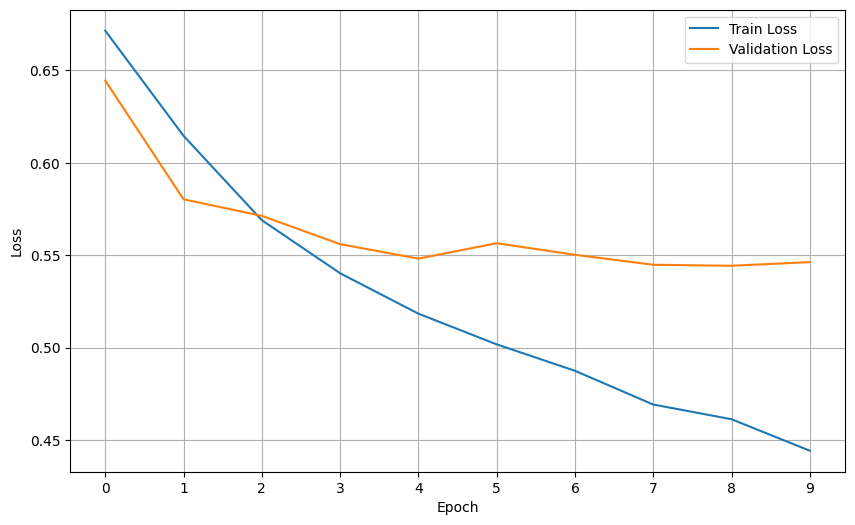

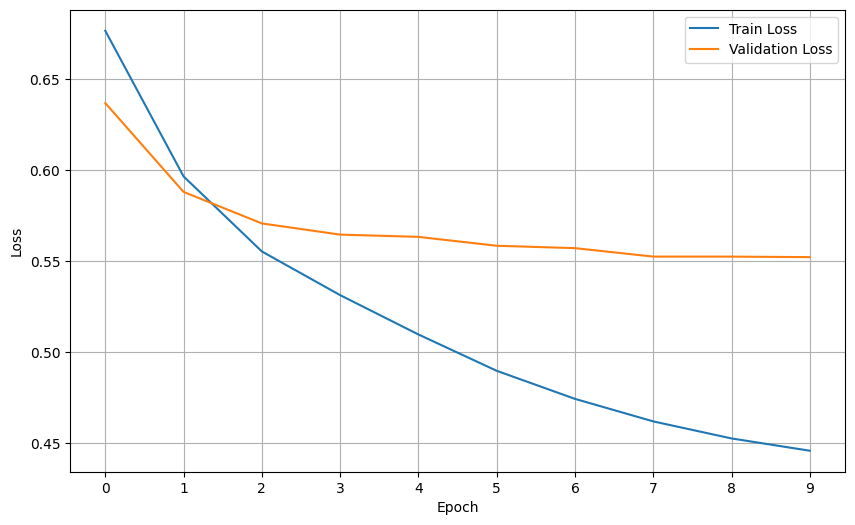

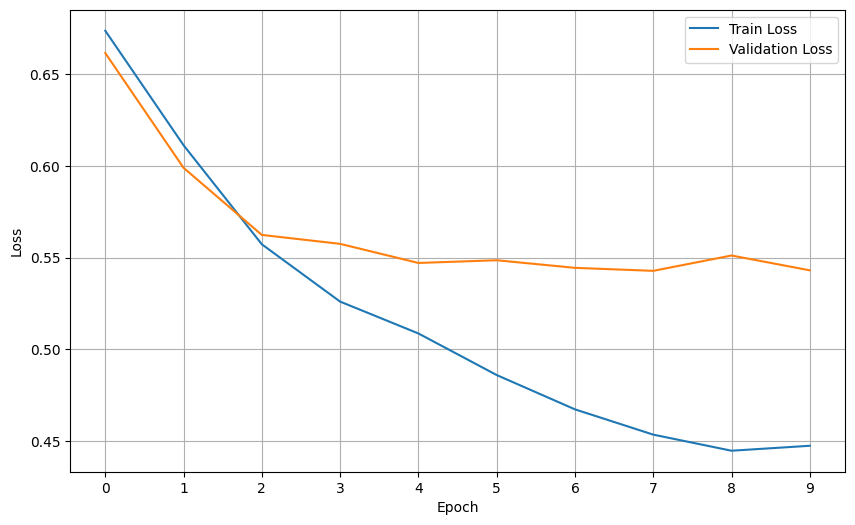

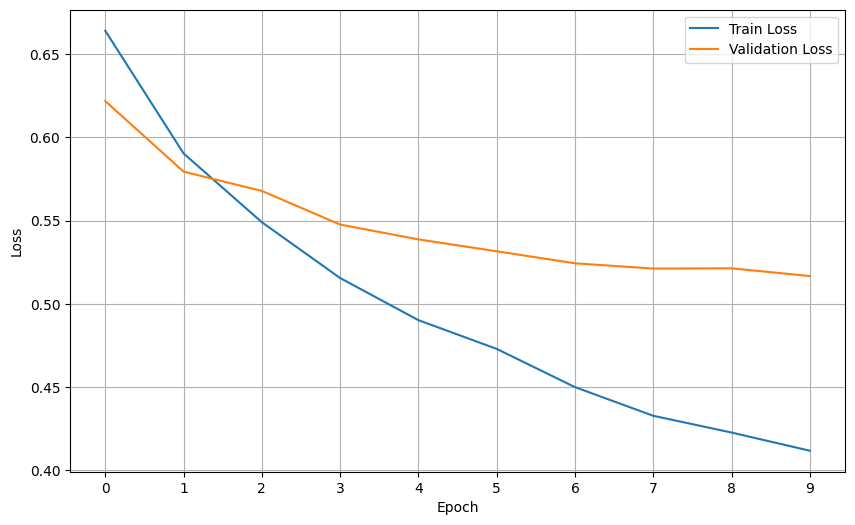

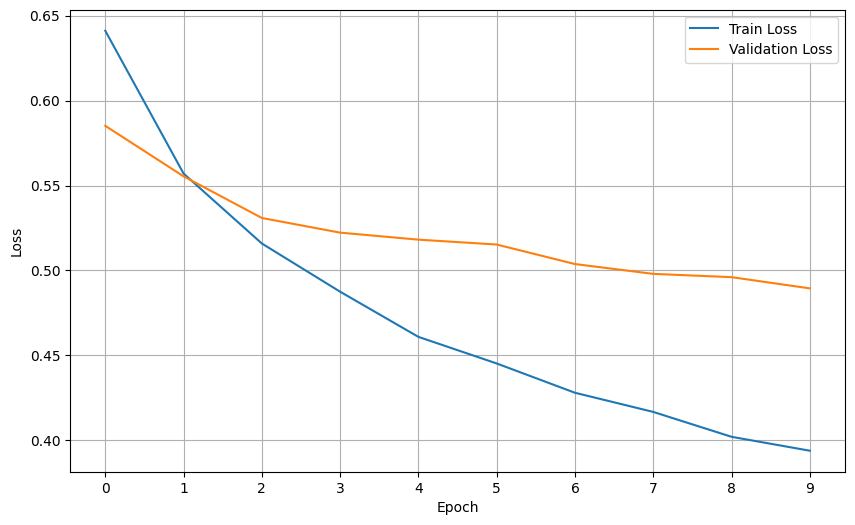

In [12]:
# Plot the loss graph
pipeline_synonym_5.plot_loss()
pipeline_synonym_10.plot_loss()
pipeline_synonym_20.plot_loss()
pipeline_synonym_50.plot_loss()
pipeline_synonym_100.plot_loss()

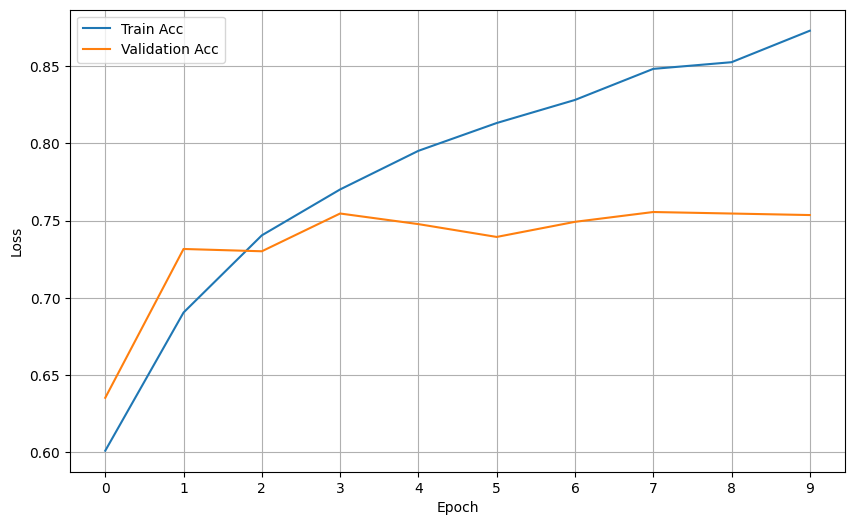

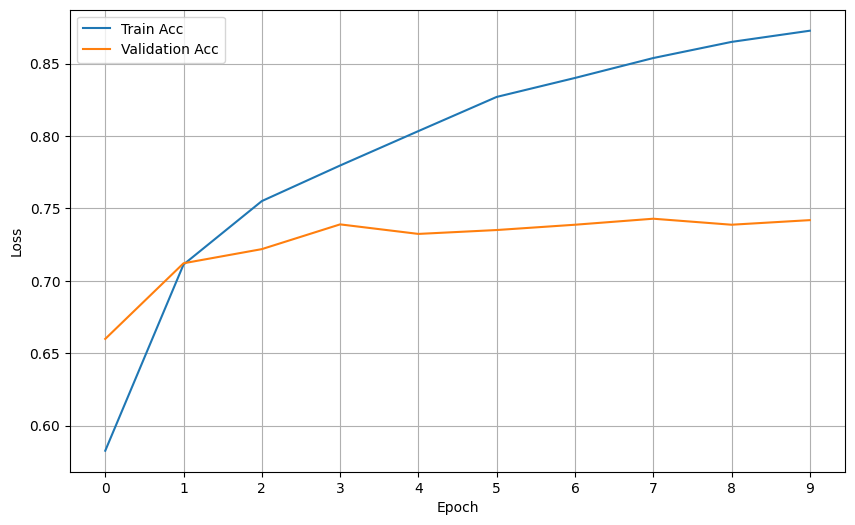

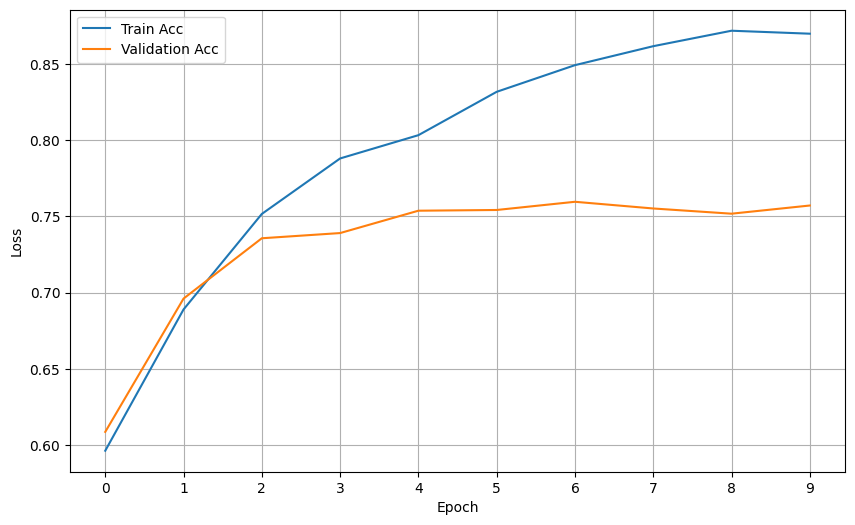

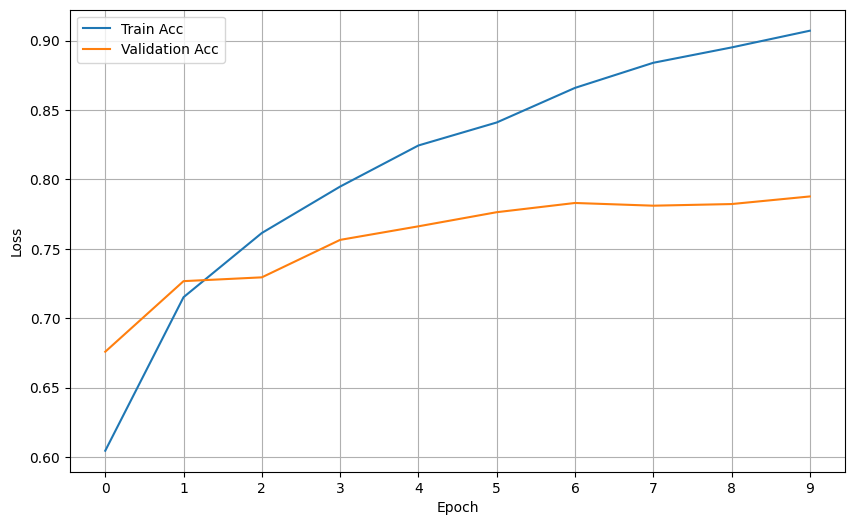

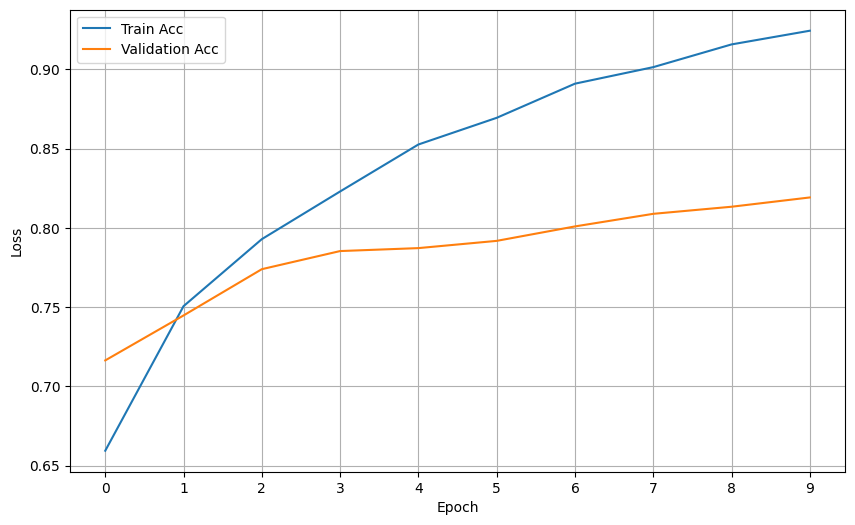

In [13]:
# Plot the acc graph
pipeline_synonym_5.plot_acc()
pipeline_synonym_10.plot_acc()
pipeline_synonym_20.plot_acc()
pipeline_synonym_50.plot_acc()
pipeline_synonym_100.plot_acc()

# Performance of Synonym Augmentation on LSTM

In [4]:
pipeline_synonym_5_LSTM= TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_10_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_20_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_50_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_100_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)


Map:   0%|          | 0/8955 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1791 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9381 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7504 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8186 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12788 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10230 [00:00<?, ? examples/s]

Map:   0%|          | 0/2558 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13641 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [5]:
pipeline_synonym_5_LSTM.train_model(n_epochs=10)
pipeline_synonym_10_LSTM.train_model(n_epochs=10)
pipeline_synonym_20_LSTM.train_model(n_epochs=10)
pipeline_synonym_50_LSTM.train_model(n_epochs=10)
pipeline_synonym_100_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


Epoch: 1/10
Train Loss: 0.691, Train Acc: 0.522
Valid Loss: 0.680, Valid Acc: 0.537


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


Epoch: 2/10
Train Loss: 0.636, Train Acc: 0.662
Valid Loss: 0.607, Valid Acc: 0.695


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


Epoch: 3/10
Train Loss: 0.576, Train Acc: 0.726
Valid Loss: 0.574, Valid Acc: 0.716


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


Epoch: 4/10
Train Loss: 0.536, Train Acc: 0.762
Valid Loss: 0.555, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]


Epoch: 5/10
Train Loss: 0.514, Train Acc: 0.788
Valid Loss: 0.558, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


Epoch: 6/10
Train Loss: 0.494, Train Acc: 0.810
Valid Loss: 0.558, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


Epoch: 7/10
Train Loss: 0.481, Train Acc: 0.829
Valid Loss: 0.554, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


Epoch: 8/10
Train Loss: 0.470, Train Acc: 0.838
Valid Loss: 0.549, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


Epoch: 9/10
Train Loss: 0.461, Train Acc: 0.850
Valid Loss: 0.545, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]


Epoch: 10/10
Train Loss: 0.455, Train Acc: 0.854
Valid Loss: 0.546, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


Epoch: 1/10
Train Loss: 0.678, Train Acc: 0.581
Valid Loss: 0.652, Valid Acc: 0.647


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


Epoch: 2/10
Train Loss: 0.592, Train Acc: 0.707
Valid Loss: 0.622, Valid Acc: 0.649


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]


Epoch: 3/10
Train Loss: 0.554, Train Acc: 0.744
Valid Loss: 0.583, Valid Acc: 0.723


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]


Epoch: 4/10
Train Loss: 0.530, Train Acc: 0.775
Valid Loss: 0.563, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 5/10
Train Loss: 0.507, Train Acc: 0.799
Valid Loss: 0.560, Valid Acc: 0.737


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


Epoch: 6/10
Train Loss: 0.497, Train Acc: 0.812
Valid Loss: 0.564, Valid Acc: 0.737


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]


Epoch: 7/10
Train Loss: 0.489, Train Acc: 0.819
Valid Loss: 0.556, Valid Acc: 0.751


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


Epoch: 8/10
Train Loss: 0.473, Train Acc: 0.839
Valid Loss: 0.570, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


Epoch: 9/10
Train Loss: 0.476, Train Acc: 0.836
Valid Loss: 0.550, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 10/10
Train Loss: 0.462, Train Acc: 0.849
Valid Loss: 0.550, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


Epoch: 1/10
Train Loss: 0.681, Train Acc: 0.584
Valid Loss: 0.624, Valid Acc: 0.676


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]


Epoch: 2/10
Train Loss: 0.595, Train Acc: 0.704
Valid Loss: 0.564, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


Epoch: 3/10
Train Loss: 0.545, Train Acc: 0.759
Valid Loss: 0.548, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]


Epoch: 4/10
Train Loss: 0.517, Train Acc: 0.786
Valid Loss: 0.539, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]


Epoch: 5/10
Train Loss: 0.494, Train Acc: 0.814
Valid Loss: 0.539, Valid Acc: 0.765


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]


Epoch: 6/10
Train Loss: 0.479, Train Acc: 0.831
Valid Loss: 0.541, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]


Epoch: 7/10
Train Loss: 0.463, Train Acc: 0.846
Valid Loss: 0.535, Valid Acc: 0.772


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


Epoch: 8/10
Train Loss: 0.451, Train Acc: 0.861
Valid Loss: 0.542, Valid Acc: 0.765


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


Epoch: 9/10
Train Loss: 0.446, Train Acc: 0.866
Valid Loss: 0.533, Valid Acc: 0.777


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]


Epoch: 10/10
Train Loss: 0.438, Train Acc: 0.874
Valid Loss: 0.537, Valid Acc: 0.771


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


Epoch: 1/10
Train Loss: 0.667, Train Acc: 0.602
Valid Loss: 0.620, Valid Acc: 0.665


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]


Epoch: 2/10
Train Loss: 0.568, Train Acc: 0.732
Valid Loss: 0.548, Valid Acc: 0.747


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


Epoch: 3/10
Train Loss: 0.519, Train Acc: 0.783
Valid Loss: 0.537, Valid Acc: 0.765


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


Epoch: 4/10
Train Loss: 0.505, Train Acc: 0.801
Valid Loss: 0.547, Valid Acc: 0.756


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


Epoch: 5/10
Train Loss: 0.482, Train Acc: 0.826
Valid Loss: 0.540, Valid Acc: 0.756


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]


Epoch: 6/10
Train Loss: 0.472, Train Acc: 0.834
Valid Loss: 0.526, Valid Acc: 0.774


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]


Epoch: 7/10
Train Loss: 0.450, Train Acc: 0.861
Valid Loss: 0.525, Valid Acc: 0.778


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


Epoch: 8/10
Train Loss: 0.438, Train Acc: 0.873
Valid Loss: 0.520, Valid Acc: 0.787


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]


Epoch: 9/10
Train Loss: 0.429, Train Acc: 0.884
Valid Loss: 0.521, Valid Acc: 0.785


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]


Epoch: 10/10
Train Loss: 0.424, Train Acc: 0.889
Valid Loss: 0.517, Valid Acc: 0.790


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch: 1/10
Train Loss: 0.655, Train Acc: 0.614
Valid Loss: 0.582, Valid Acc: 0.720


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch: 2/10
Train Loss: 0.551, Train Acc: 0.750
Valid Loss: 0.561, Valid Acc: 0.730


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch: 3/10
Train Loss: 0.517, Train Acc: 0.783
Valid Loss: 0.538, Valid Acc: 0.764


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch: 4/10
Train Loss: 0.487, Train Acc: 0.821
Valid Loss: 0.523, Valid Acc: 0.781


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch: 5/10
Train Loss: 0.467, Train Acc: 0.844
Valid Loss: 0.522, Valid Acc: 0.781


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


Epoch: 6/10
Train Loss: 0.451, Train Acc: 0.861
Valid Loss: 0.515, Valid Acc: 0.790


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]


Epoch: 7/10
Train Loss: 0.434, Train Acc: 0.878
Valid Loss: 0.513, Valid Acc: 0.795


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch: 8/10
Train Loss: 0.433, Train Acc: 0.879
Valid Loss: 0.529, Valid Acc: 0.781


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


Epoch: 9/10
Train Loss: 0.434, Train Acc: 0.878
Valid Loss: 0.514, Valid Acc: 0.790


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

Epoch: 10/10
Train Loss: 0.424, Train Acc: 0.889
Valid Loss: 0.511, Valid Acc: 0.795


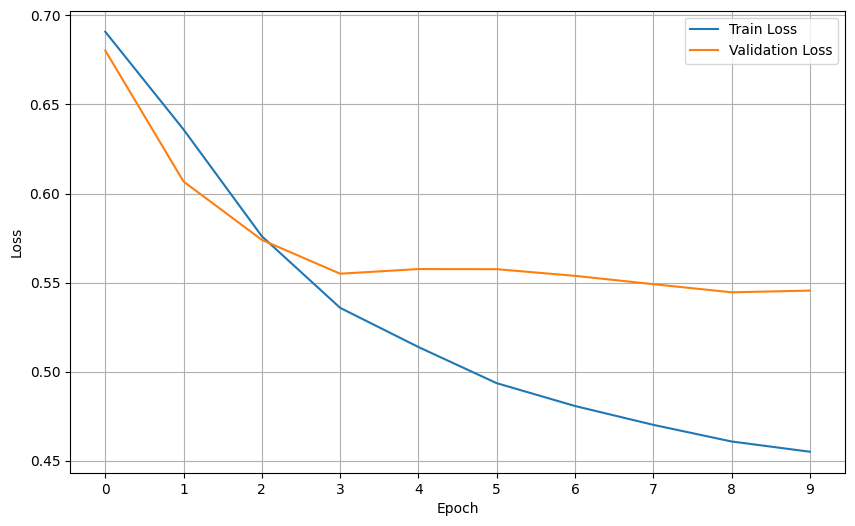

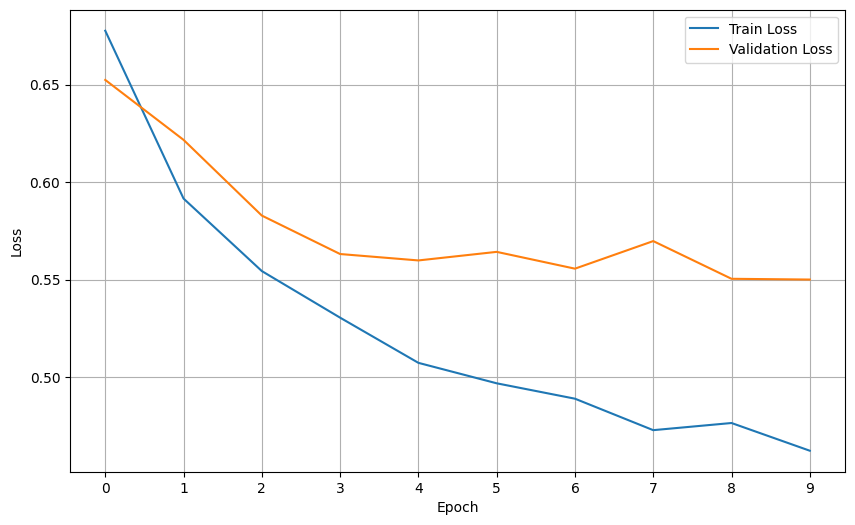

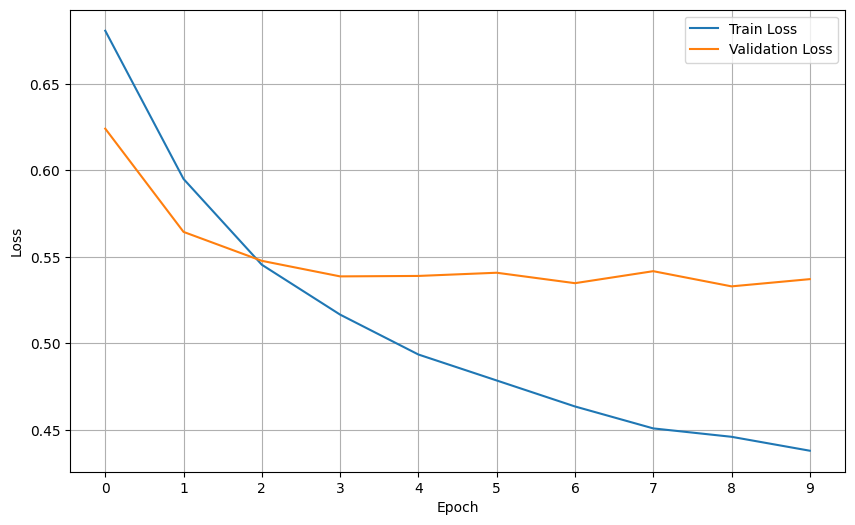

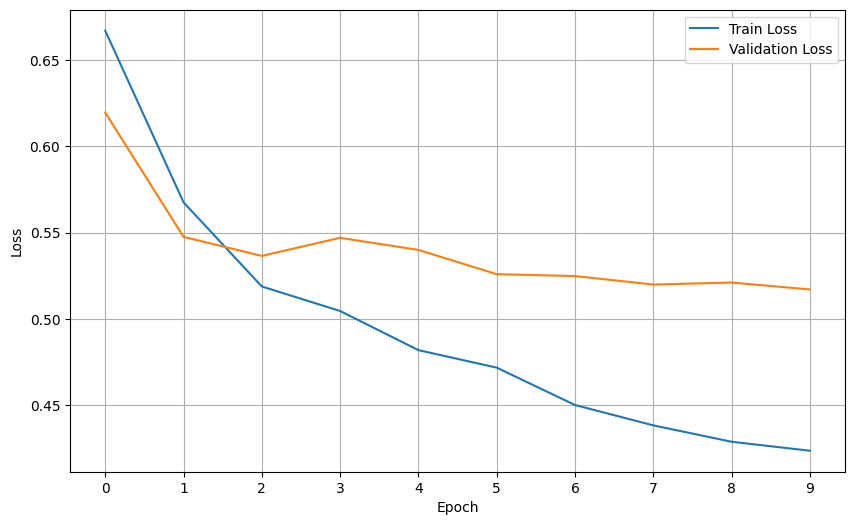

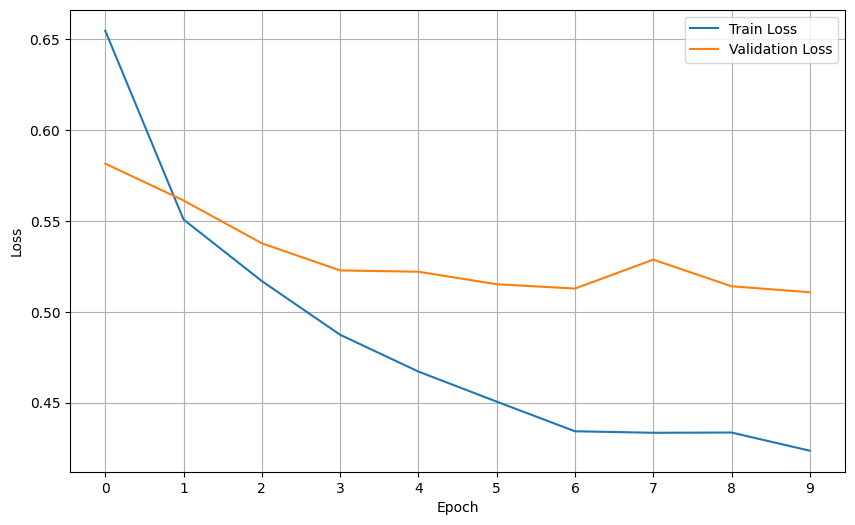

In [6]:
pipeline_synonym_5_LSTM.plot_loss()
pipeline_synonym_10_LSTM.plot_loss()
pipeline_synonym_20_LSTM.plot_loss()
pipeline_synonym_50_LSTM.plot_loss()
pipeline_synonym_100_LSTM.plot_loss()

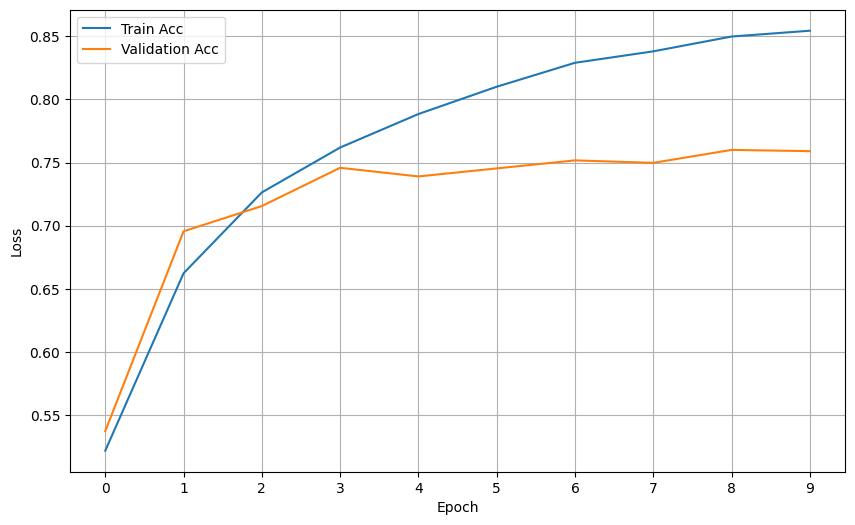

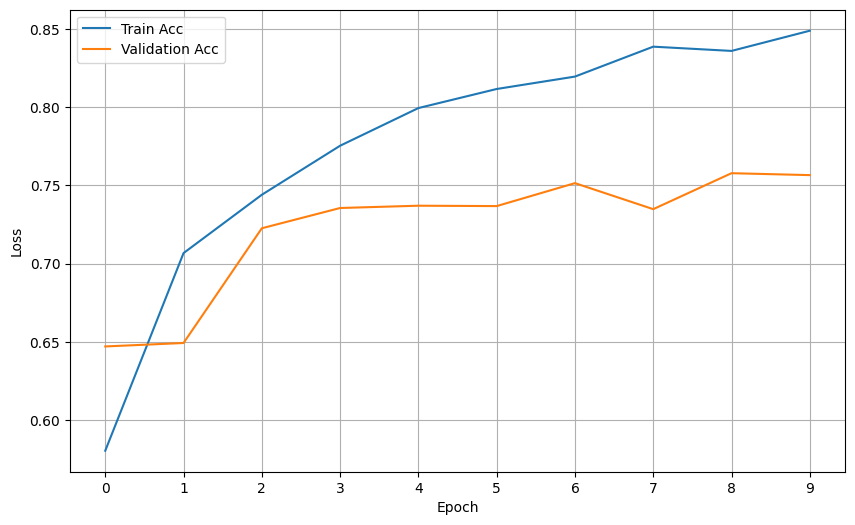

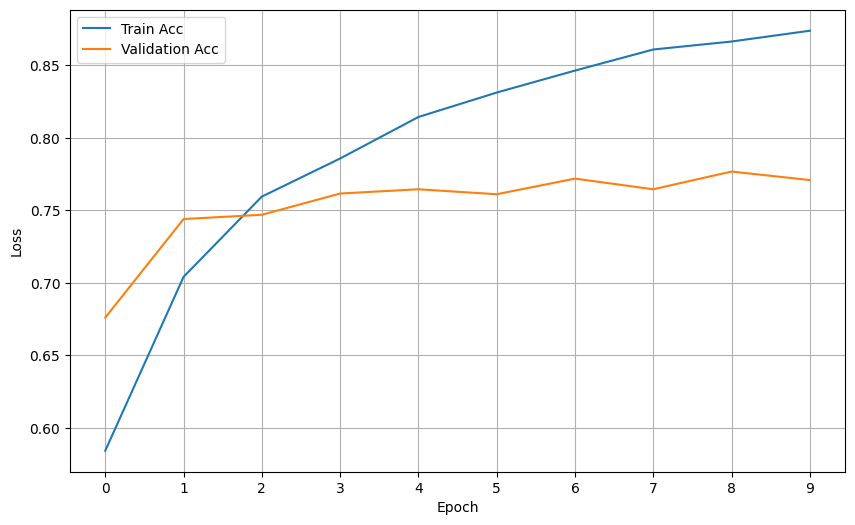

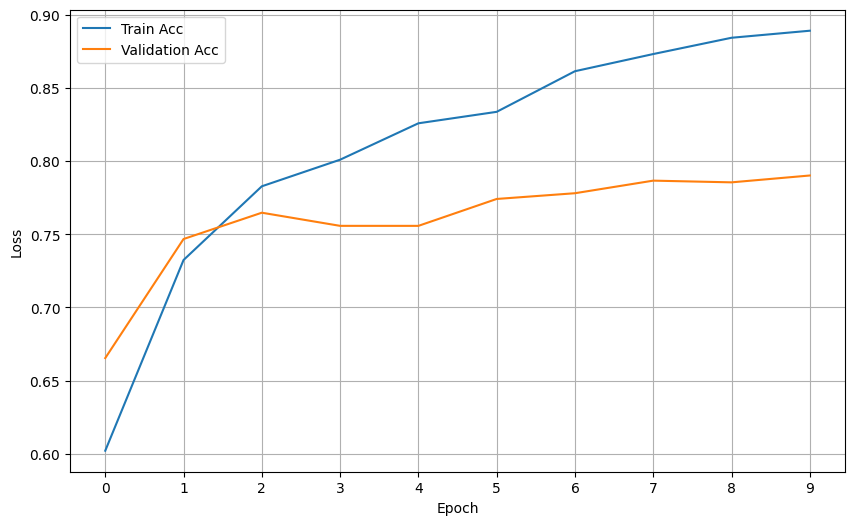

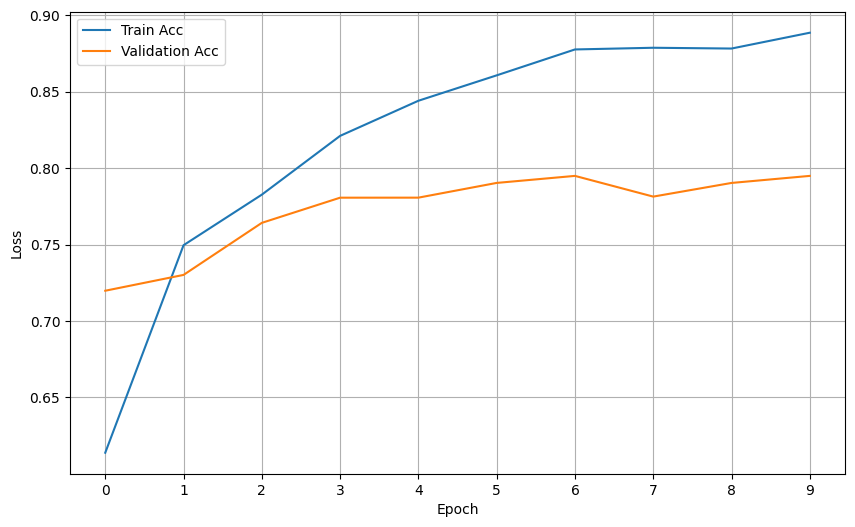

In [7]:
pipeline_synonym_5_LSTM.plot_acc()
pipeline_synonym_10_LSTM.plot_acc()
pipeline_synonym_20_LSTM.plot_acc()
pipeline_synonym_50_LSTM.plot_acc()
pipeline_synonym_100_LSTM.plot_acc()